### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

**Answer:**
The condition is the independent variable and the time the dependent variable. 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Answer:**

An appropriate null hypothesis ($H_0$) would be that the average time ($t$) it takes the test persons to answer is equal  for incongruent words condition (subscript $i$) and for the congruent one (subscript $c$). The alternative hypothesis ($H_A$) could be that the average answer time is not equal for both groups (for example for a two-sided t-test). 

Mathematically that would be:

$$H_0: t_c = t_i$$
$$H_A: t_c \neq t_i$$

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [3]:
df['Incongruent'].describe()-df['Congruent'].describe()

count     0.000000
mean      7.964792
std       1.237699
min       7.057000
25%       6.821500
50%       6.661000
75%       7.850750
max      12.927000
dtype: float64

**Answer:** The mean answer time for the incongruent group is 22.02 while it is 14.05 for the congruent group, i.e. the difference in the mean is 7.96. The difference in the median is less with 6.66 (21.02 for the incongruent group and 14.36 for the congruent). 
The standard deviation is also larger for the incongruent group with 4.80 compared with 3.56 (difference of 1.24). 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

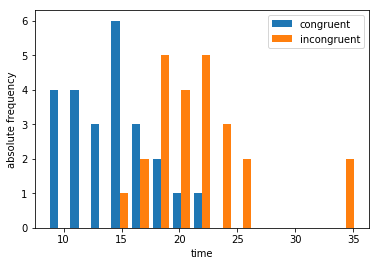

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([df['Congruent'],df['Incongruent']],bins=15,label=["congruent","incongruent"])
plt.legend()
plt.ylabel('absolute frequency')
plt.xlabel('time');

**Answer:** The histogram shows the distribution of the answer times for the congruent (blue) and the incongruent (orange) group. It seams like in the congruent group answer times were often below 15 with only a small portion of the answers taking longer than 20. The distribution is rather right tailed. For the incongruent group the answer time was most often around 20. The distribution is close to normal apart from a few outliers around 35. 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [5]:
from scipy import stats
t_test=stats.ttest_rel(df['Incongruent'],df['Congruent'])
t_test

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

In [6]:
from math import sqrt
from scipy.stats import t

N1 = df['Incongruent'].count()
N2 = df['Congruent'].count()
degf = (N1 + N2 - 2)
std1 = df['Incongruent'].std()
std2 = df['Congruent'].std()
std_N1N2 = sqrt( ((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / degf) 

diff_mean = df['Incongruent'].mean() - df['Congruent'].mean()
MoE = stats.t.ppf(0.975, degf) * std_N1N2 * sqrt(1/N1 + 1/N2)

print('The results of the independent t-test are: \n\tt-value = {:4.3f}\n\tp-value = {:4.3f}'.format(t_test[0],t_test[1]))
print ('\nThe difference between groups is {:5.3f} [{:5.3f} to {:5.3f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))

The results of the independent t-test are: 
	t-value = 8.021
	p-value = 0.000

The difference between groups is 7.965 [5.510 to 10.419] (mean [95% CI])


**Answer:** We can reject our null hypothesis because of the following results:

The results of the independent t-test are: 
	t-value = 8.021
	p-value = 0.000

The difference between groups is 7.965 [5.510 to 10.419] (mean [95% CI])

For a threshold of a type I error rate of 5% (we could even choose 1% or smaller here), we can say that the answer time is significantly different. 

That people answer faster when they are in the congruent group can be expected. From the histgram in Q4 it could already be suspected that the difference is significant. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--